<a href="https://colab.research.google.com/github/Kshiti200/trading_bot/blob/main/OPENCVCAPSTONESIMPSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install caer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import kagglehub
path = kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset")

Using Colab cache for faster access to the 'the-simpsons-characters-dataset' dataset.


In [ ]:
import os
import caer
import numpy as np
import cv2 as cv
import gc

In [ ]:
IMG_SIZE = (80,80)
channels = 1
char_path = os.path.join(path, "simpsons_dataset")

In [ ]:
char_dict = {}

for item in os.listdir(char_path):
    full_path = os.path.join(char_path, item)
    if os.path.isdir(full_path):
        char_dict[item] = len(os.listdir(full_path))

char_dict


{'rainier_wolfcastle': 45,
 'maggie_simpson': 128,
 'krusty_the_clown': 1206,
 'waylon_smithers': 181,
 'professor_john_frink': 65,
 'fat_tony': 27,
 'ralph_wiggum': 89,
 'otto_mann': 32,
 'martin_prince': 71,
 'barney_gumble': 106,
 'ned_flanders': 1454,
 'patty_bouvier': 72,
 'sideshow_mel': 40,
 'marge_simpson': 1291,
 'abraham_grampa_simpson': 913,
 'selma_bouvier': 103,
 'mayor_quimby': 246,
 'disco_stu': 8,
 'lionel_hutz': 3,
 'simpsons_dataset': 42,
 'troy_mcclure': 8,
 'agnes_skinner': 42,
 'groundskeeper_willie': 121,
 'kent_brockman': 498,
 'charles_montgomery_burns': 1193,
 'carl_carlson': 98,
 'chief_wiggum': 986,
 'apu_nahasapeemapetilon': 623,
 'bart_simpson': 1342,
 'edna_krabappel': 457,
 'gil': 27,
 'comic_book_guy': 469,
 'principal_skinner': 1194,
 'cletus_spuckler': 47,
 'milhouse_van_houten': 1079,
 'snake_jailbird': 55,
 'nelson_muntz': 358,
 'lisa_simpson': 1354,
 'lenny_leonard': 310,
 'moe_szyslak': 1452,
 'miss_hoover': 17,
 'homer_simpson': 2246,
 'sideshow_b

In [ ]:
characters = []
count = 0
for name in char_dict:
  characters.append(name)
  count += 1
  if count >= 10:
    break

characters


['rainier_wolfcastle',
 'maggie_simpson',
 'krusty_the_clown',
 'waylon_smithers',
 'professor_john_frink',
 'fat_tony',
 'ralph_wiggum',
 'otto_mann',
 'martin_prince',
 'barney_gumble']

In [ ]:
train = caer.preprocess_from_dir(char_path,characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 45 files found in 0.06748008728027344s
[INFO] 128 files found in 0.28383660316467285s
[INFO] At 1000 files
[INFO] 1206 files found in 1.4825258255004883s
[INFO] 181 files found in 0.4599723815917969s
[INFO] 65 files found in 0.11684703826904297s
[INFO] 27 files found in 0.01700878143310547s
[INFO] 89 files found in 0.1794877052307129s
[INFO] 32 files found in 0.03388690948486328s
[INFO] 71 files found in 0.11538410186767578s
[INFO] 106 files found in 0.23160839080810547s
----------------------------------------------
[INFO] 1950 files preprocessed! Took 0m 17s


In [ ]:
len(train)

1950

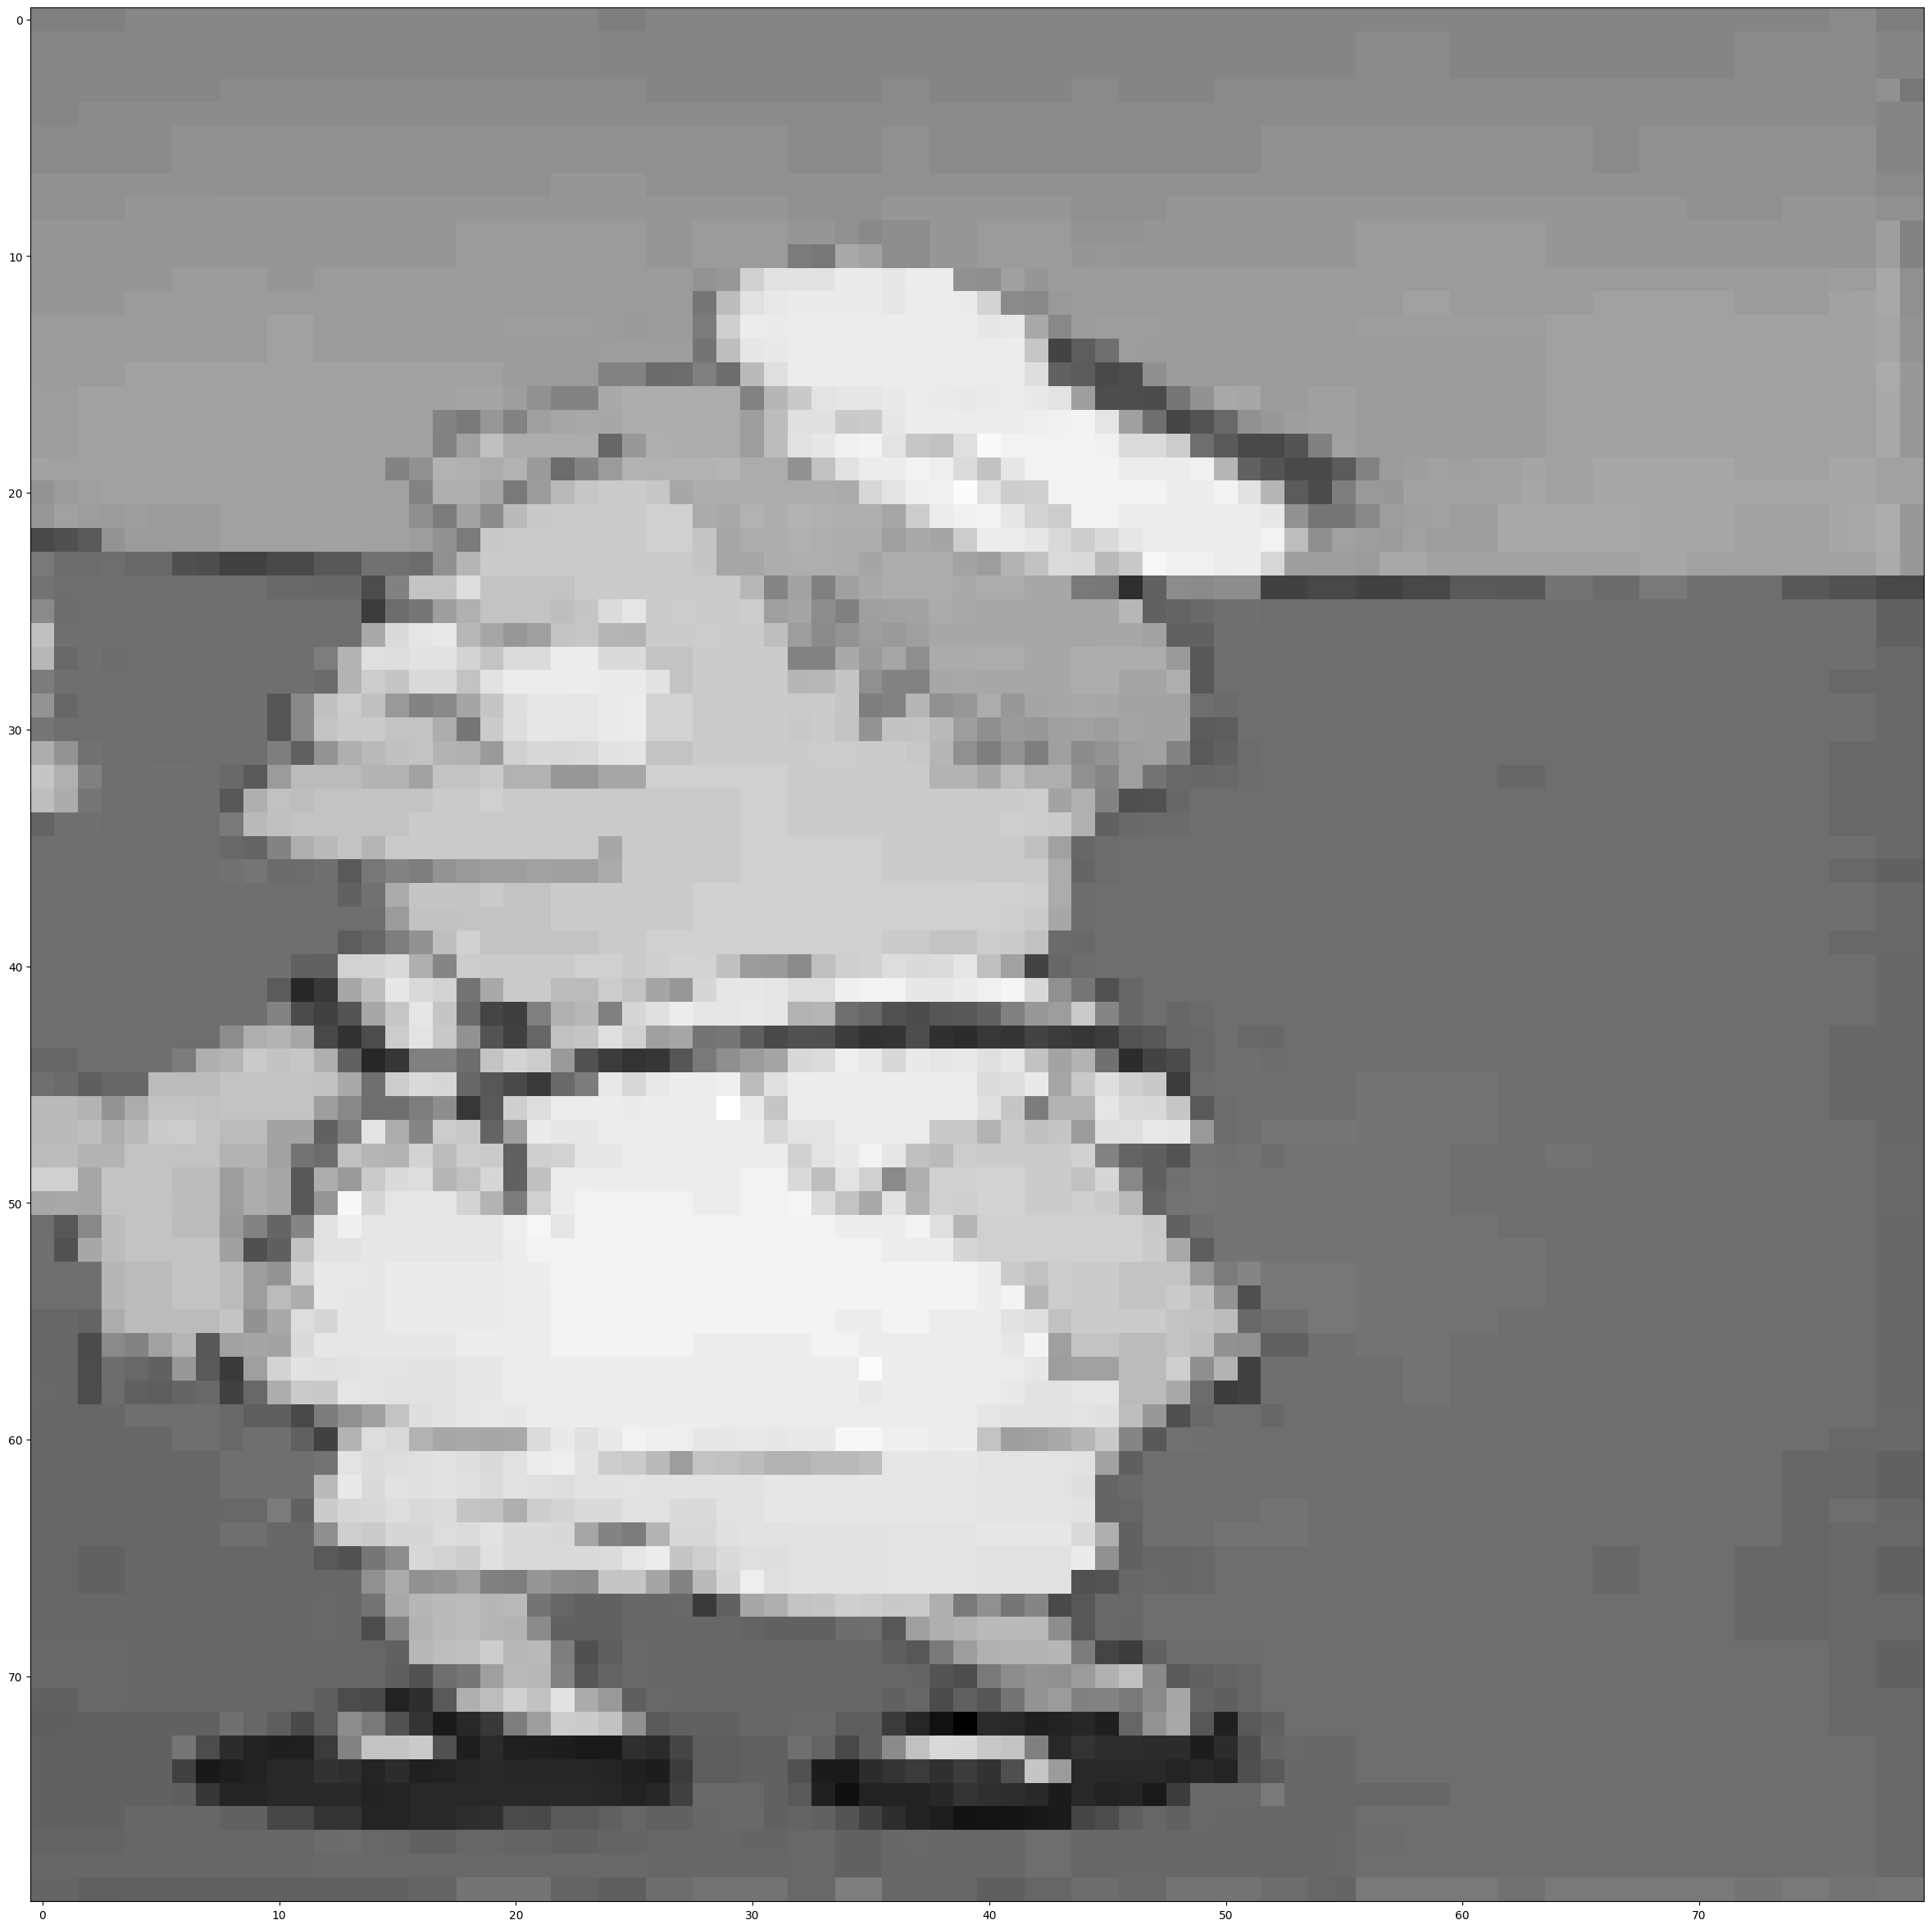

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [ ]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [ ]:
from tensorflow.keras.utils import to_categorical
#normalize the featureset
featureSet = caer.normalize(featureSet)


In [ ]:
x_train,x_val,y_train,y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [ ]:
del train
del featureSet
del labels
gc.collect()

0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
BATCH_SIZE = 32
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

output_dim=10

w, h = IMG_SIZE[:2]

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))

# Output Layer
model.add(Dense(output_dim, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3
)

callbacks_list = [early_stop, checkpoint, reduce_lr]


In [ ]:


# recompile with sparse loss
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# then fit (same as before)
training = model.fit(
    train_gen,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    epochs=30,
    validation_data=(x_val, y_val),
    validation_steps=len(y_val)//BATCH_SIZE,
    callbacks=callbacks_list
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.3923 - loss: 2.2052

48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.3955 - loss: 2.2006 - val_accuracy: 0.5908 - val_loss: 1.5477 - learning_rate: 0.0010
Epoch 2/30
 1/48 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5312 - loss: 1.8278

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5312 - loss: 1.8278 - val_accuracy: 0.5908 - val_loss: 1.5398 - learning_rate: 0.0010
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6202 - loss: 1.4674 - val_accuracy: 0.5908 - val_loss: 1.5513 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 1.3495 - val_accuracy: 0.5908 - val_loss: 1.5467 - learning_rate: 0.0010
Epoch 5/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6090 - loss: 1.4525

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6098 - loss: 1.4513 - val_accuracy: 0.5908 - val_loss: 1.5385 - learning_rate: 0.0010
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5625 - loss: 1.5842 - val_accuracy: 0.5908 - val_loss: 1.5409 - learning_rate: 0.0010
Epoch 7/30
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6214 - loss: 1.4418

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6218 - loss: 1.4410 - val_accuracy: 0.5908 - val_loss: 1.5209 - learning_rate: 0.0010
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 1.9544 - val_accuracy: 0.5908 - val_loss: 1.5264 - learning_rate: 0.0010
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6257 - loss: 1.4161 - val_accuracy: 0.5908 - val_loss: 1.5269 - learning_rate: 0.0010
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 1.4823 - val_accuracy: 0.5908 - val_loss: 1.5280 - learning_rate: 0.0010
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6193 - loss: 1.4396 - val_accuracy: 0.5908 - val_loss: 1.5321 - learning_rate: 2.0000e-04
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 1.4415 - val_accuracy: 0.5908 - val_loss: 1.5320 - learning_rate: 2.0000e-04


In [ ]:
characters

['rainier_wolfcastle',
 'maggie_simpson',
 'krusty_the_clown',
 'waylon_smithers',
 'professor_john_frink',
 'fat_tony',
 'ralph_wiggum',
 'otto_mann',
 'martin_prince',
 'barney_gumble']

Exists: True
Is file: True


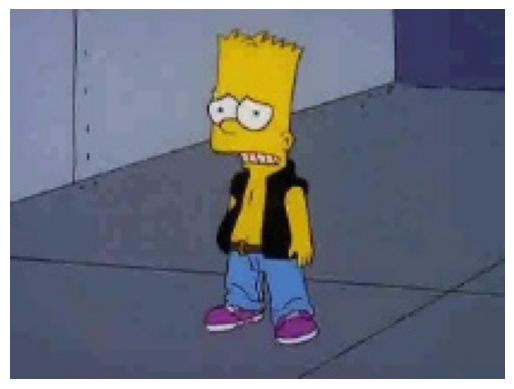

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

test_path = os.path.join(
    path,
    "kaggle_simpson_testset",
    "kaggle_simpson_testset",
    "bart_simpson_1.jpg"
)

print("Exists:", os.path.exists(test_path))
print("Is file:", os.path.isfile(test_path))

img = cv.imread(test_path)

if img is None:
    print("Failed to load image — cv.imread returned None")
else:
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()


In [ ]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [ ]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


In [ ]:
predictions

array([[0.e+00, 0.e+00, 1.e+00, 1.e-45, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00]], dtype=float32)

In [ ]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

krusty_the_clown
